In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

In [24]:
df = pd.DataFrame(data)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


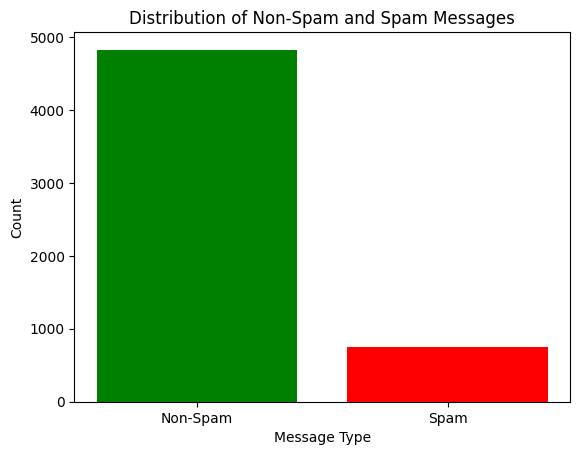

In [34]:
spam_count = data[data['Category'] == 1].shape[0]
ham_count = data[data['Category'] == 0].shape[0]
labels = ['Non-Spam', 'Spam']
counts = [ham_count, spam_count]
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Non-Spam and Spam Messages')
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [26]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9865470852017937
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [27]:
def classify_sms(message):
    message_vectorized = vectorizer.transform([message])
    prediction = model.predict(message_vectorized)
    if prediction[0] == 1:
        return "SPAM"
    else:
        return "NOT SPAM"

In [28]:
sms_message = "Claim your free gift now!"
print("Message:", sms_message)
print("Classification:", classify_sms(sms_message))

print("\n")

sms_message = "How are you doing?"
print("Message:", sms_message)
print("Classification:", classify_sms(sms_message))

Message: Claim your free gift now!
Classification: SPAM


Message: How are you doing?
Classification: NOT SPAM
